In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from yellowbrick.model_selection import learning_curve

In [2]:
df = pd.read_excel('fenomena_ekonomi_LU.xlsx')

In [3]:
df

,link,berita,kategori
0,https://aceh.tribunnews.com/2020/03/10/harga-c...,petani cengkeh di kabupaten simeulue saat ini ...,A1
1,https://aceh.tribunnews.com/2020/03/20/wabah-c...,harga tandan buah segar tbs kelapa sawit di ka...,A1
2,https://aceh.tribunnews.com/2020/03/13/bumg-ga...,badan usaha milik gampong bumg ladang sepakat ...,A1
3,https://aceh.tribunnews.com/2020/02/06/ini-8-k...,sebelumnya pupuk urea dijatah ton sekarangan n...,A1
4,https://aceh.tribunnews.com/2020/01/29/gunakan...,dari sebanyak delapan kecamatan di pidie tanam...,A1
...,...,...,...
752,https://news.detik.com/berita/d-3983782/sambut...,komisi pemilihan umum kpu mengadakan pagelaran...,RSTU
753,http://banjarmasin.tribunnews.com/2018/05/29/p...,usaha jasa laundry selama ramadan ini alami pe...,RSTU
754,https://money.kompas.com/read/2019/10/02/05513...,jumlah kunjungan wisawatan mancanegara wisman ...,RSTU
755,https://www.bola.com/indonesia/read/4057716/ka...,september menjadi periode sibuk bagi timnas in...,RSTU


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   link      752 non-null    object
 1   berita    757 non-null    object
 2   kategori  757 non-null    object
dtypes: object(3)
memory usage: 17.9+ KB


<Axes: xlabel='kategori'>

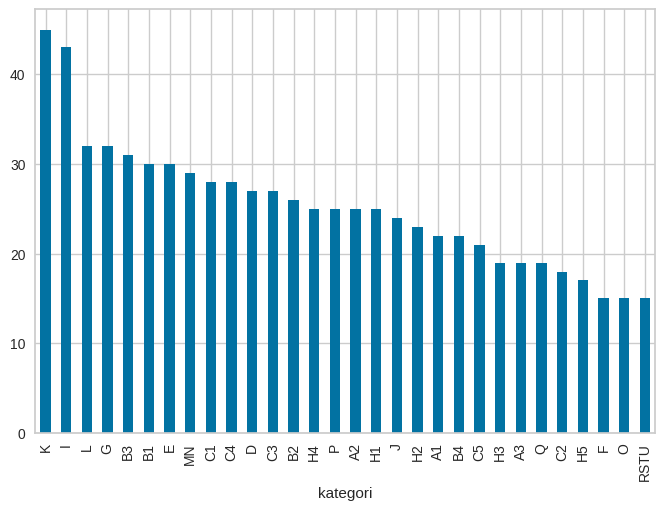

In [5]:
df.kategori.value_counts().plot(kind='bar')

In [6]:
df.berita.values[0]

'petani cengkeh di kabupaten simeulue saat ini mengeluh karena rendahnya harga jual cengkeh di wilayah kepulauan itu petani cengkeh menyebutkan harga jual cengkeh tahun ini turun drastis dibanding tahun sebelumnya yang pernah mencapai harga tertinggi rp ribu per kilogram petani cengkeh di simeulue andi kepada serambinewscom selasa mengatakan bahwa harga jual cengkeh di simeulue saat ini tak sampai rp ribu per kilogram sangat turun dari tahun sebelumnya februari lalu saya tanya harga sekilo rp ribu semalam saya tanya lagi sudah turun menjadi rp ribu sekilo ujar andi di sinabang yang turut diiyakan petani cengkeh lainnya harga tersebut lanjut andi merupakan harga di pasar sinabang sementara kalau harga yang dibeli langsung oleh pengepul yang beli langsung dari petani harganya di bawah harga tersebut kalau tahun yang lalu itu sampai rp ribu rp ribu malah ada yang sampai rp ribu sekilo imbuhnya dikatakan jika harga cengkeh terus bertahan dengan harga saat ini maka banyak petani tidak mampu

## tokenisasi 

In [7]:
def tokenisasi(words):
    return word_tokenize(words)

In [8]:
df['berita_clean'] = df.berita.apply(tokenisasi)

## hapus stopwords

In [9]:
indo_stopword=stopwords.words('indonesian')

In [10]:
def stopwords_removal(words):
    return [word for word in words if word not in indo_stopword]

In [11]:
df.berita_clean = df.berita_clean.apply(stopwords_removal)

## stemming

In [12]:
# factory=StemmerFactory()
# stemmer=factory.create_stemmer()

In [13]:
# def stemmer_func(word):
#     return stemmer.stem(word)

In [14]:
# word_dict={}

# for document in df.berita_clean:
#     for word in document:
#         if word not in word_dict:
#             word_dict[word]=' '
# for word in word_dict:
#     word_dict[word]=stemmer_func(word)

In [15]:
# def get_stemmer_word(document):
#     return [word_dict[word] for word in document]

In [16]:
# df.berita_clean = df.berita_clean.apply(get_stemmer_word)

## convert to text

In [17]:
def list_text(token):
    text=' '
    return text.join(token)

In [18]:
df.berita_clean = df.berita_clean.apply(list_text)

In [19]:
df.berita_clean.values[0]

'petani cengkeh kabupaten simeulue mengeluh rendahnya harga jual cengkeh wilayah kepulauan petani cengkeh harga jual cengkeh turun drastis dibanding mencapai harga tertinggi rp ribu kilogram petani cengkeh simeulue andi serambinewscom selasa harga jual cengkeh simeulue rp ribu kilogram turun februari harga sekilo rp ribu semalam turun rp ribu sekilo andi sinabang diiyakan petani cengkeh harga andi harga pasar sinabang harga dibeli langsung pengepul beli langsung petani harganya harga rp ribu rp ribu rp ribu sekilo imbuhnya harga cengkeh bertahan harga petani panen buah cengkeh petani cengkeh membutuhkan tenaga pekerja tambahan panen mengeluarkan biaya'

## wordcloud

In [20]:
text_berita = df.berita_clean.to_string()

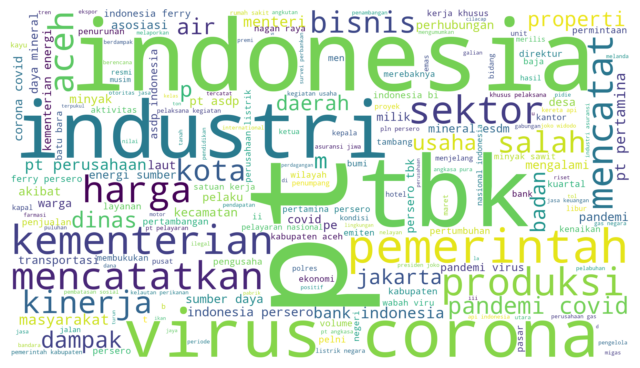

In [21]:
wordcloud=WordCloud(background_color='white', width=1920,height=1080)
wordcloud.generate(text_berita)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## label encoding

In [22]:
x = df.berita_clean
y = df.kategori

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
label = dict(zip(list(y), df.kategori.to_list()))

## model selection

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [24]:
perform_list = []

In [25]:
def run_model(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=42)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10)

    text_clf = Pipeline([
         ('tfidf', TfidfVectorizer()),
         ('random', RandomOverSampler(sampling_strategy='auto', random_state=42)),
         ('clf', OneVsRestClassifier(mdl)),
    ])

    text_clf.fit(X_train, y_train)
    y_pred = text_clf.predict(X_test)
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
         ]))

In [26]:
run_model('Logistic Regression')

Test Accuracy Score of Basic Logistic Regression: % 82.89


In [27]:
run_model('Random Forest')

Test Accuracy Score of Basic Random Forest: % 75.0


In [28]:
run_model('Multinomial Naive Bayes')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 82.24


In [29]:
run_model('Support Vector Classifer')

Test Accuracy Score of Basic Support Vector Classifer: % 81.58


In [30]:
run_model('Decision Tree Classifier')

Test Accuracy Score of Basic Decision Tree Classifier: % 54.61


In [31]:
run_model('K Nearest Neighbour')

Test Accuracy Score of Basic K Nearest Neighbour: % 69.74


In [32]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy']]
model_performance

,Model,Test Accuracy
0,Logistic Regression,82.89
1,Random Forest,75.00
2,Multinomial Naive Bayes,82.24
3,Support Vector Classifer,81.58
4,Decision Tree Classifier,54.61
5,K Nearest Neighbour,69.74


## Tuning MultinomialNB

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
text_clf = Pipeline([
         ('tfidf', TfidfVectorizer()),
         ('random', RandomOverSampler(sampling_strategy='auto', random_state=42)),
         ('clf', OneVsRestClassifier(estimator=MultinomialNB())),
    ])

In [64]:
param_grid = {
    'tfidf__max_features': [500, 1000, 5000, 6000, 7000], #, 8000, 9000, 10000, 11000
    'clf__estimator__alpha': [0.1, 0.5, 1.0], 
}

In [65]:
# logistic_reg = {
#     'tfidf__max_features': [500, 1000, 5000, 6000, 7000],
#     'clf__estimator__solver': ['newton-cg', 'lbfgs', 'liblinear'],
#     'clf__estimator__C': [100, 10, 1.0, 0.1, 0.01],
#     'clf__estimator__penalty': ['l2']
# }

In [66]:
grid_search = GridSearchCV(text_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('random',
                                        RandomOverSampler(random_state=42)),
                                       ('clf',
                                        OneVsRestClassifier(estimator=MultinomialNB()))]),
             param_grid={'clf__estimator__alpha': [0.1, 0.5, 1.0],
                         'tfidf__max_features': [500, 1000, 5000, 6000, 7000]})

In [67]:
grid_search.best_params_

{'clf__estimator__alpha': 0.1, 'tfidf__max_features': 7000}

In [68]:
grid_search.best_score_

0.8198347107438015

In [69]:
best = grid_search.best_estimator_

In [70]:
prediksi = best.predict(X_test)

In [71]:
akurasi = round(accuracy_score(y_test, prediksi)*100, 2)
print(f'akurasi = {akurasi} %')

akurasi = 84.21 %


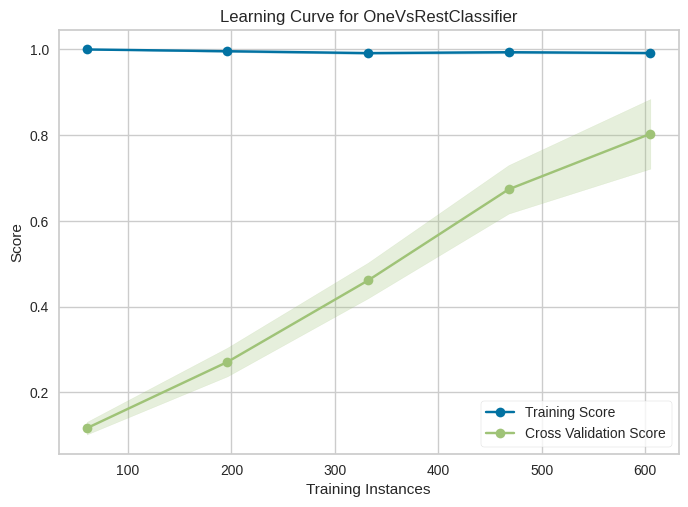

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
learning_curve(best, x, y, scoring='accuracy')

## no tuning

In [73]:
text_clf = Pipeline([
         ('tfidf', TfidfVectorizer(max_features=7000)),
         ('random', RandomOverSampler(sampling_strategy='auto', random_state=42)),
         ('clf', MultinomialNB(alpha=0.1)),
    ])

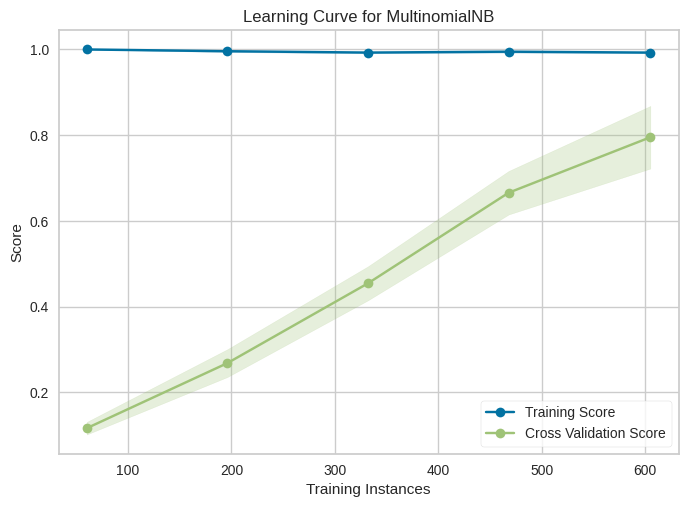

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
learning_curve(text_clf, x, y, scoring='accuracy')

In [75]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=7000)),
                ('random', RandomOverSampler(random_state=42)),
                ('clf', MultinomialNB(alpha=0.1))])

In [76]:
prediksi = text_clf.predict(X_test)

In [77]:
akurasi_notuning = round(accuracy_score(y_test, prediksi)*100, 2)
print(f'akurasi = {akurasi_notuning} %')

akurasi = 82.24 %


## akurasi sebelum dan sesudah hypertuning

In [78]:
pd.DataFrame({
    'sebelum' : [akurasi_notuning],
    'sesudah' : [akurasi]
})

,sebelum,sesudah
0,82.24,84.21


## test prediksi

In [98]:
berita_baru = ['nelayan mnangkap banyak ikan']

In [99]:
pred = text_clf.predict(berita_baru)

In [100]:
label[pred[0]]

'A3'

## save model

In [82]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(best,f)